<a href="https://colab.research.google.com/github/egatchal/CA_Model/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#uploaded = files.upload()
url = "https://raw.githubusercontent.com/egatchal/CA_Model/main/heart.csv"

In [25]:
# loads the csv file
df2 = pd.read_csv(url)
# gets a list of all the features
features = df2.columns.values.tolist()

# converts all feature data into numbers
for feature in features:
  if type(df2[feature][0]) != np.int64:
    unique_features = np.unique(df2[feature].tolist())
    toReplace = {unique_features[i]:i for i in range(len(unique_features))}
    df2[feature] = df2[feature].replace(toReplace)
print(features)

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [26]:
Y = df2.output
X = df2.drop("output", axis=1) # last column is labels
print(X.shape)

(303, 13)


(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

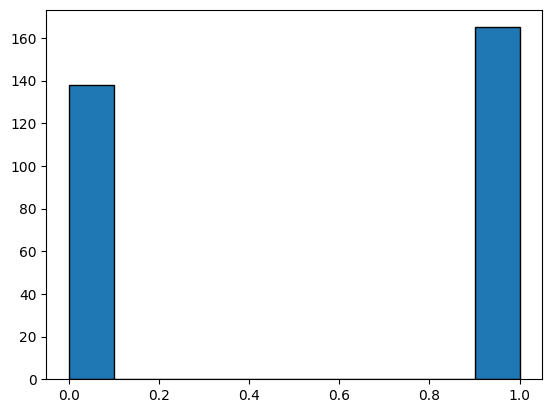

In [27]:
plt.hist(Y, ec="black")

In [28]:
from collections import defaultdict
# Find features with more than 75% the same label
over75percent = []
print("Features List:", features)
for f in range(X.shape[1]): # for each featyre
  counts = defaultdict(int)
  for i in X[features[f]]:
    counts[i]+= 1
  for k, v in counts.items():
    # print(k, v)
    if (v/X.shape[0]) * 100 >= 75:
      print(f"there are {v} datapoints with {features[f]} = {k}... this is {(v/X.shape[0]) * 100}%")
      over75percent.append([features[f], v, (v/X.shape[0]) * 100])

print("Features List 75%:", over75percent)

Features List: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
there are 258 datapoints with fbs = 0... this is 85.14851485148515%
Features List 75%: [['fbs', 258, 85.14851485148515]]


In [29]:
print([t[0] for t in over75percent])

['fbs']


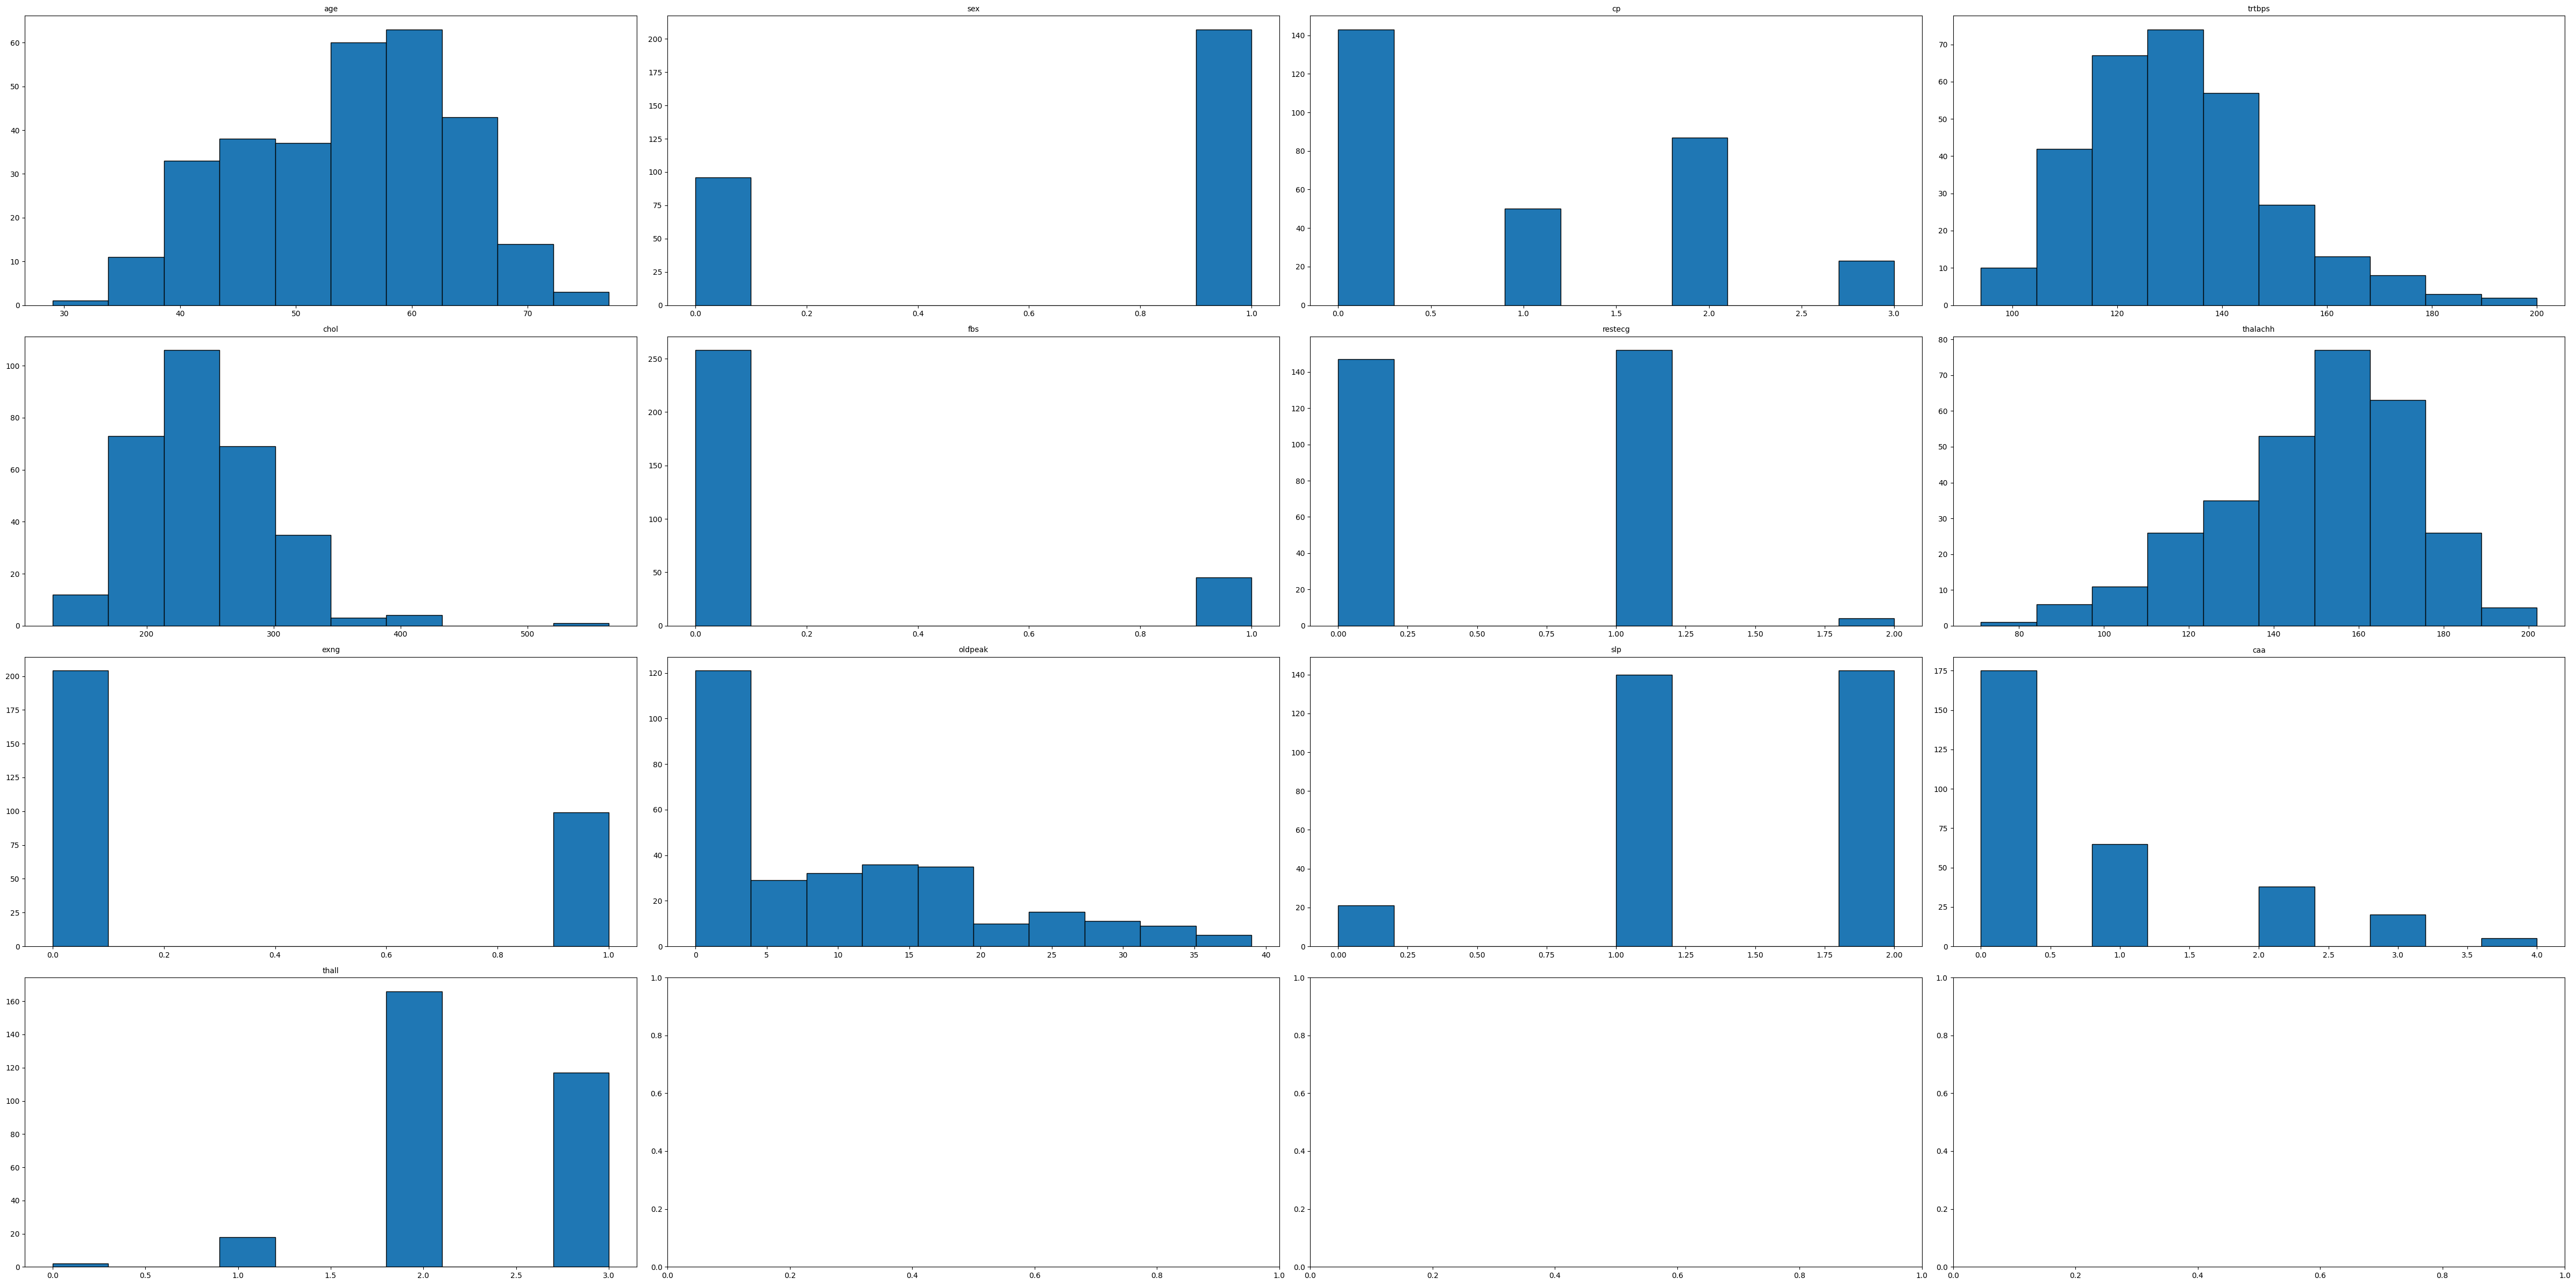

In [30]:
# Figure of all the features
fig, axes = plt.subplots(4, 4, figsize=(48, 24))

for i in range(X.shape[1]):
  axes[i//4,i%4].hist(X[features[i]], ec="black")
  axes[i//4,i%4].set_title(features[i], fontsize=10)

fig.tight_layout()

In [31]:
featuresTR = [0,1,2,3,4,6,7,8,9,10,11,12] #chosen features
featuresTR = [features[i] for i in featuresTR]
X = df2[featuresTR]
X

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,0,150,0,22.0,0,0,1
1,37,1,2,130,250,1,187,0,32.0,0,0,2
2,41,0,1,130,204,0,172,0,14.0,2,0,2
3,56,1,1,120,236,1,178,0,8.0,2,0,2
4,57,0,0,120,354,1,163,1,6.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,1,123,1,2.0,1,0,3
299,45,1,3,110,264,1,132,0,12.0,1,0,3
300,68,1,0,144,193,1,141,0,31.0,1,2,3
301,57,1,0,130,131,1,115,1,12.0,1,1,3


In [33]:
df3 = pd.DataFrame(df2.drop("fbs", axis=1)) # remove the label we dont want
df3.to_csv("CA_data.csv", index=True)

In [34]:
print(df2)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0     22.0    0   
1     37    1   2     130   250    0        1       187     0     32.0    0   
2     41    0   1     130   204    0        0       172     0     14.0    2   
3     56    1   1     120   236    0        1       178     0      8.0    2   
4     57    0   0     120   354    0        1       163     1      6.0    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      2.0    1   
299   45    1   3     110   264    0        1       132     0     12.0    1   
300   68    1   0     144   193    1        1       141     0     31.0    1   
301   57    1   0     130   131    0        1       115     1     12.0    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  